[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/compmem/sithshow/blob/main/examples/cme_demo.ipynb)


In [ ]:
!pip install -q SITHshow@git+https://github.com/compmem/SITHshow

There are many methods approximate an inverse Laplace transform. Here we rely on concentrated matrix exponential (CME) distributions proposed by [Horváth et al.](https://www.sciencedirect.com/science/article/pii/S0166531619302457?via%3Dihub)

In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from sithshow import CMECell

SITH follows the differential equation $\frac{dF}{dt} = \alpha(t)*(-sF + f(t))$

In [3]:
sith_cell = CMECell(in_size='scalar',
                    tau_min=1,
                    tau_max=500,
                    n_taus=50,
                    max_fn_evals=10,
                    g=0)

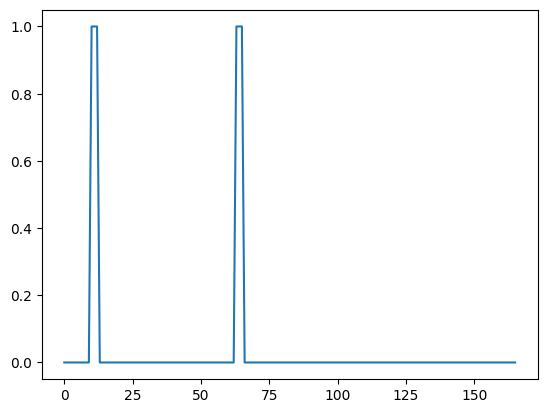

In [4]:
signal = jnp.concatenate([jnp.zeros(10), jnp.ones(3), jnp.zeros(50), jnp.ones(3), jnp.zeros(100)])
plt.plot(signal);

If we set $\alpha(t) = 1$, we get $\frac{dF}{dt} = -sF + f(t)$

In [5]:
def track_signal_over_time(signal):    
    def step(F, f):
        F, til_f = sith_cell(F, f, alpha=jnp.ones_like(f))
            
        return F, til_f

    final_F, til_fs = jax.lax.scan(step, sith_cell.get_init_F(delta=False), signal)

    return til_fs

(166, 50)


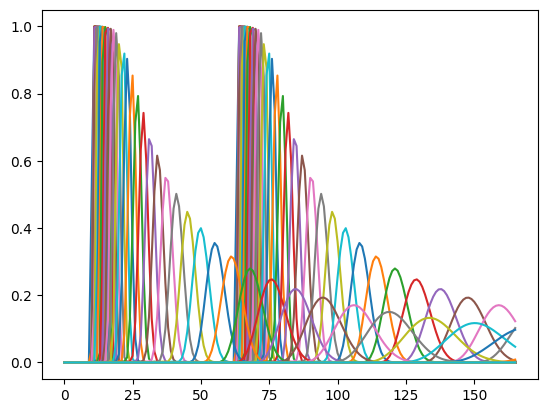

In [6]:
# TODO: have color gradients, add alpha transparency

til_fs = track_signal_over_time(signal)

print(til_fs.shape)

plt.plot(til_fs);

If we set $\alpha(t) = \frac{dx}{dt}$ and make $f(t)$ a delta function at the start of the signal, we get $\frac{dF}{dt} = -\frac{dx}{dt}*sF + f(t)$, and we can integrate $x$ over time.

In [7]:
def track_latent_dim(signal):    
    def step(F, f):
        F, til_f = sith_cell(F, jnp.zeros_like(f), alpha=f)
          
        return F, til_f

    final_F, til_fs = jax.lax.scan(step, sith_cell.get_init_F(delta=True), signal)

    return til_fs

(166, 50)


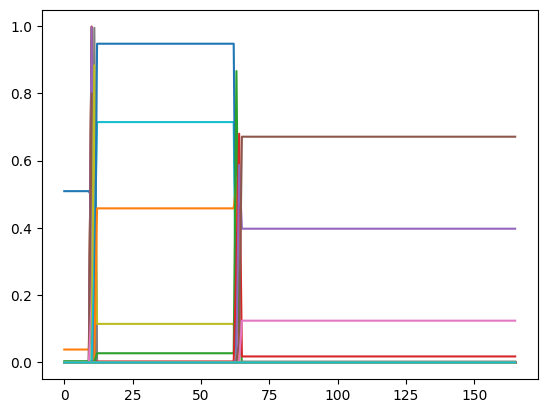

In [8]:
til_fs = track_latent_dim(signal)

print(til_fs.shape)

plt.plot(til_fs);